In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
#%matplotlib notebook
%matplotlib inline

In [7]:
city_data = "../data/city_data.csv"
ride_data = "../data/ride_data.csv"

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [8]:
combined_city_ride_df = pd.merge(city_data_df, ride_data_df,
                                how='outer', on='city')
combined_city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [9]:
Total_Fare = combined_city_ride_df["fare"].sum()
Total_Fare

63538.64

In [10]:
combined_city_ride_df = combined_city_ride_df.fillna(0)
combined_city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [51]:
gb = combined_city_ride_df.groupby("city")
gb.head(0)

,city,driver_count,type,date,fare,ride_id


In [54]:
City_Type = gb["type"].count()
City_Type.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: type, dtype: int64

In [55]:
Average_Fare = gb['fare'].mean()

Average_Fare.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
Name: fare, dtype: float64

In [56]:
Total_Number_of_Rides = gb['ride_id'].count()

Total_Number_of_Rides.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [80]:
Total_Number_of_Drivers = gb['driver_count'].sum()

Total_Number_of_Drivers.head()

city
Amandaburgh      216
Barajasview      572
Barronchester    176
Bethanyland      396
Bradshawfurt      70
Name: driver_count, dtype: int64

In [81]:
x_axis = Average_Fare
y_axis = Total_Number_of_Rides
s_axis = Total_Number_of_Drivers
colors = City_Type

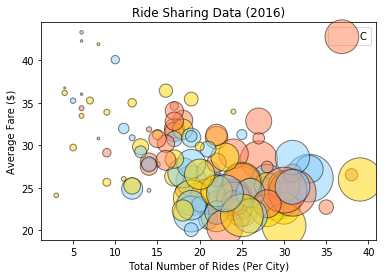

In [82]:
plt.title("Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.scatter(Total_Number_of_Rides, Average_Fare, s=Total_Number_of_Drivers, marker="o", alpha="0.5", facecolors=["coral","lightskyblue", "gold"], edgecolors="black")
plt.legend('City_Type')
plt.savefig("Ride_Sharing_Data.png")
plt.show()

In [40]:
gb1 = combined_city_ride_df.groupby("type")
gb1.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871


In [41]:
Total_Fares = gb1['fare'].sum()
Total_Fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [42]:
city_type = ["Rural", "Suburban", "Urban"]
fares = [4327.93, 19356.33, 39854.38]
colors = ["gold","lightskyblue", "lightcoral"]
explode = (0,0,0.1)

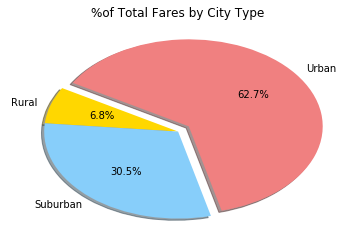

In [64]:
plt.title("%of Total Fares by City Type")
plt.pie(fares, explode=explode, labels=city_type, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150)
#plt.axis("equal")
plt.savefig("%Total_Fares_by_City_Type.png")
plt.show()

#As shown on the figure the majority of fares of the rides is in the urban area.

In [44]:
Total_Rides_by_City_Type = gb1['ride_id'].count()
Total_Rides_by_City_Type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [45]:
city_type = ["Rural", "Suburban", "Urban"]
rides = [125, 625, 1625]
colors = ["gold","lightskyblue", "lightcoral"]
explode = (0,0,0.1)

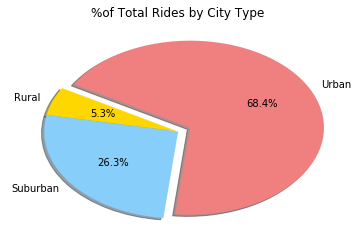

In [63]:
plt.title("%of Total Rides by City Type")
plt.pie(rides, explode=explode, labels=city_type, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150)
#plt.axis("equal")
plt.savefig("%Total_Rides_by_City_Type.png")
plt.show()

#The fig. dipicts more percentage of the rides are in the Urban area.

In [47]:
Total_Drivers_by_City_Type = gb1['driver_count'].sum()
Total_Drivers_by_City_Type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [48]:
city_type = ["Rural", "Suburban", "Urban"]
drivers = [537, 8570, 59602]
colors = ["gold","lightskyblue", "lightcoral"]
explode = (0,0,0.1)

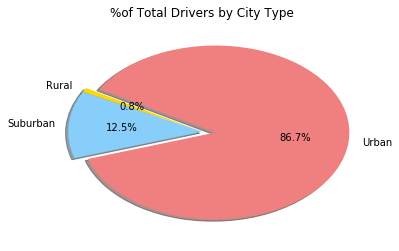

In [62]:
plt.title("%of Total Drivers by City Type")
plt.pie(drivers, explode=explode, labels=city_type, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150)
#plt.axis("equal")
plt.savefig("%Total_Drivers_by_City_Type.png")
plt.show()

#As shown on the pie chart there is less number of drivers in the rural area